### Feature Selection in Supervised Learning

Model Performance ~ 1/Number of features

Dimensionality Reduction
1. Feature Selection
- Correlation
- Mutual Information
-  ANOVA
- Chi-square Test
- Regularization methods
2. Feature Extraction
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Linear Discriminant Analysis (LDA)

### Mutual Information

Regression Problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50, n_features=5)

In [5]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,0.537257,0.455946,-0.313119,0.902001,-0.282994
1,-0.980263,0.147079,0.552835,-0.269984,-1.387667
2,1.281845,0.703424,0.983490,-0.954383,0.415510
3,0.893421,-0.203407,-0.586809,1.636002,-0.788218
4,-1.400980,0.680843,1.331857,1.324944,0.163243


In [6]:
y[:5]

array([  -7.94003138, -139.95583344,  126.86044254,  -70.74343152,
         35.71403303])

In [9]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [10]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(X,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x0000015A867E1C18>)

In [11]:
fs.scores_

array([0.10219259, 0.11846136, 0.04213771, 0.05241847, 0.78797871])

In [12]:
mi_score=pd.Series(fs.scores_, index=X.columns)

In [13]:
mi_score

0    0.102193
1    0.118461
2    0.042138
3    0.052418
4    0.787979
dtype: float64

<AxesSubplot:>

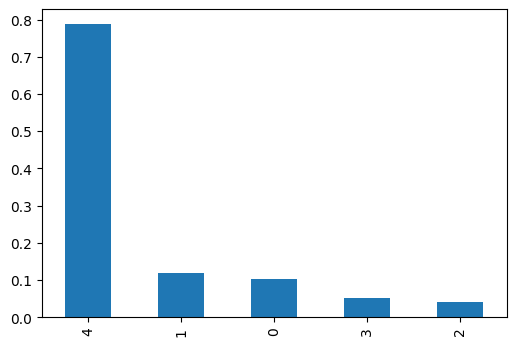

In [14]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [15]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected)

In [16]:
X_selected.head()

,0,1,2
0,0.537257,0.455946,-0.282994
1,-0.980263,0.147079,-1.387667
2,1.281845,0.703424,0.415510
3,0.893421,-0.203407,-0.788218
4,-1.400980,0.680843,0.163243


Classification Problem

In [17]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [18]:
X, y = make_classification(n_samples=50, n_features=5, n_informative=2)
X = pd.DataFrame(X)

In [19]:
X.head()

,0,1,2,3,4
0,-2.260210,0.491298,1.225132,1.462347,1.369383
1,0.146982,-1.739554,-1.560721,0.639358,1.678982
2,-0.582802,-0.954245,0.495937,0.287792,0.138182
3,-0.374176,-0.033049,0.494965,0.097215,-0.122054
4,-1.932558,-0.432016,1.350977,1.099878,0.808624


In [20]:
y[:5]

array([1, 1, 1, 0, 1])

<AxesSubplot:>

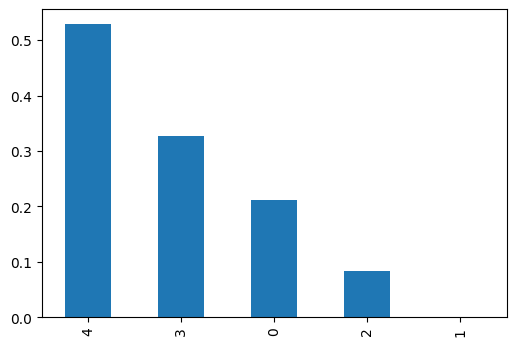

In [21]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [22]:
selected_X = fs.fit_transform(X, y)
selected_X = pd.DataFrame(selected_X)

In [23]:
selected_X.head()

,0,1,2
0,-2.260210,1.462347,1.369383
1,0.146982,0.639358,1.678982
2,-0.582802,0.287792,0.138182
3,-0.374176,0.097215,-0.122054
4,-1.932558,1.099878,0.808624
